In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.rcParams['figure.figsize'] = 8,4
import scipy.stats as stats
import missingno
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import os

os.getcwd()

'/Users/rhannula'

In [3]:
os.chdir('/Users/rhannula/Downloads')

### Data Description:								
								

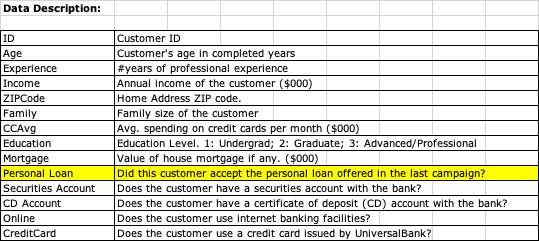

We can assume from this already that **Personal_loan, Securities_acc, Cd_acc, Online and Credit_card** can be considered as binary variables.

While **Income, CCAvg, Mortage** is considered to be Continuous variables due to their being able to have an infinite number of values between any two values.

**Age** and **Experience** would be considered as discrete variable as it can assume only a finite number of real values within a given interval. Age is discrete as it is rounded to a complete year thus making it countable between any two values. Same with Experience. 

**Zip_code** would be considered as categorical variable as the data does not have a logical order.

In [4]:
bankloan = pd.read_excel('Bank_loan.xlsx', sheet_name='Data')

In [5]:
# We retrieve the first 5 rows to explore the DataFrame
bankloan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
# we rename some of the names of columns

bankloan.rename(columns={
    'ZIP Code': 'Zip_code',
    'Personal Loan': 'Personal_loan',
    'Securities Account': 'Securities_acc',
    'CD Account': 'Cd_acc',
    'CreditCard': 'Credit_card'
}, inplace=True)

bankloan.columns

Index(['ID', 'Age', 'Experience', 'Income', 'Zip_code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_loan', 'Securities_acc', 'Cd_acc',
       'Online', 'Credit_card'],
      dtype='object')

In [7]:
# We check how many columns and rows there is in the DF (rows, columns)
bankloan.shape

(5000, 14)

In [8]:
# basic info of the DF
bankloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              5000 non-null   int64  
 1   Age             5000 non-null   int64  
 2   Experience      5000 non-null   int64  
 3   Income          5000 non-null   int64  
 4   Zip_code        5000 non-null   int64  
 5   Family          5000 non-null   int64  
 6   CCAvg           5000 non-null   float64
 7   Education       5000 non-null   int64  
 8   Mortgage        5000 non-null   int64  
 9   Personal_loan   5000 non-null   int64  
 10  Securities_acc  5000 non-null   int64  
 11  Cd_acc          5000 non-null   int64  
 12  Online          5000 non-null   int64  
 13  Credit_card     5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


We see that ['ZIP Code'] column is considered as interger type but it represents which may be divided into groups, meaning it is Categorical datatype. We need to change the datatype.

In [9]:
# change the ['ZIP Code'] column from 'int64' to 'categorical'
bankloan['Zip_code'] = bankloan['Zip_code'].astype('category')

In [10]:
bankloan['Zip_code'].dtypes

CategoricalDtype(categories=[ 9307, 90005, 90007, 90009, 90011, 90016, 90018, 90019,
                  90024, 90025,
                  ...
                  95973, 96001, 96003, 96008, 96064, 96091, 96094, 96145,
                  96150, 96651],
, ordered=False)

---

In [11]:
# we'll check how many different values each columns has
empty_dic = {}
for x in bankloan.columns:
    empty_dic[x] = bankloan[x].nunique()

empty_dic

{'ID': 5000,
 'Age': 45,
 'Experience': 47,
 'Income': 162,
 'Zip_code': 467,
 'Family': 4,
 'CCAvg': 108,
 'Education': 3,
 'Mortgage': 347,
 'Personal_loan': 2,
 'Securities_acc': 2,
 'Cd_acc': 2,
 'Online': 2,
 'Credit_card': 2}

As we can see that there is quite a few unique values in these columns so we will modify these into **discresized continuous variables** *by creating a set of contiguous intervals (or bins) that go across the range of our variable.* 

We will also discretized the existing discrete variables further to more bins as there is still too many categories or values in the variable.

In [12]:
# check the basic statistics on the DF
bankloan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0
Securities_acc,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


We see that there is negative value(s) in the Experience variable so we need to change that

In [13]:
no_negative_values = np.where(bankloan['Experience'] < 0, bankloan['Experience'].mean(), bankloan['Experience'])

---

In [14]:
# we check to see if there is any null or NaN values in our Df with table by column
total = (bankloan.isnull().sum()).sort_values(ascending=False)
percentage = ((bankloan.isnull().sum()/bankloan.isnull().count())*100).sort_values(ascending=False)
missing_values = pd.concat(objs=[total,percentage],axis=1, keys=['Total', 'Percentage'])

missing_values

,Total,Percentage
ID,0,0.0
Age,0,0.0
Experience,0,0.0
Income,0,0.0
Zip_code,0,0.0
Family,0,0.0
CCAvg,0,0.0
Education,0,0.0
Mortgage,0,0.0
Personal_loan,0,0.0


simple way of checking null values: bankloan.isnull().sum()

<AxesSubplot:>

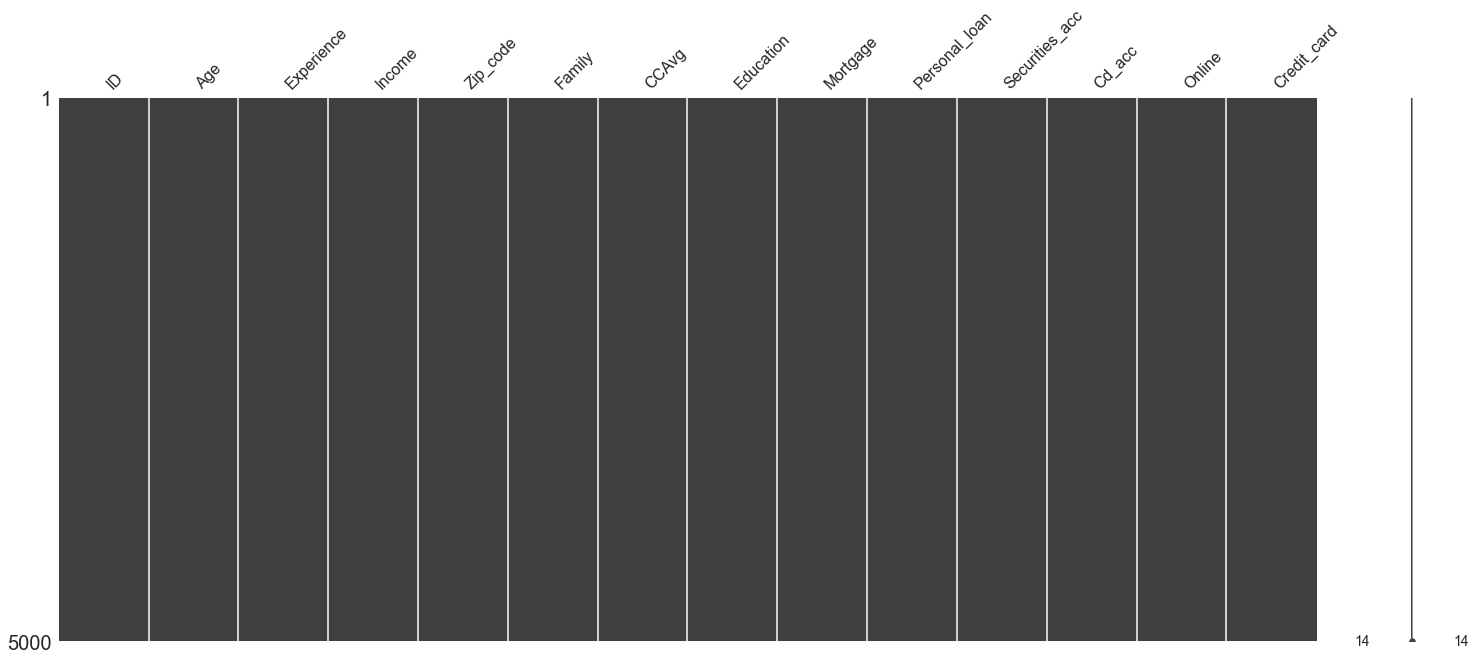

In [15]:
missingno.matrix(df=bankloan)

---

## For this data analysis, we'll create 2 new DataFrames

We'll create one for exploring discretised continuous variables (continuous variables which have been sorted into some kind of category) and another for exploring continuous variables. We may have a quantitative variable(s) in our data set that we want to discretize it or bin it or categorize it based on the values of the variable such that it is 0 or 1.

The goal for the next few steps is to figure out how best to process the data so our machine learning model can learn from it.

Ideally, all the features will be encoded into a numerical value of some kind.

In [16]:
df_bin = bankloan.copy() # subframe to host discretized continuous variables (binned)
df_con = bankloan.copy() # subframe to host continuous variables as it is and not bin/bucket them

---

## Feature Engineering

### Discretized continuous variables into binned subframe

Here we will discretize our variables into distinctive bins or categories and add it into df_bin subframe

In [17]:
# drop the ID column from new DF

df_bin.drop(labels='ID', axis=1, inplace=True)

In [18]:
# We'll iterate the columns we want to discretize through looping and conditioning

for x in df_bin[['Experience','Age','Income','CCAvg','Mortgage']]:
    if x == 'Experience':
        no_negative_values = np.where(bankloan['Experience'] < 0, bankloan['Experience'].mean(), bankloan['Experience'])
        df_bin[x] = pd.cut(no_negative_values, bins=3)
    else:
        columnSeries = bankloan[x]
        df_bin[x] = pd.cut(columnSeries.values, bins=3)

df_bin[['Experience','Age','Income','CCAvg','Mortgage']]

,Experience,Age,Income,CCAvg,Mortgage
0,"(-0.043, 14.333]","(22.956, 37.667]","(7.784, 80.0]","(-0.01, 3.333]","(-0.635, 211.667]"
1,"(14.333, 28.667]","(37.667, 52.333]","(7.784, 80.0]","(-0.01, 3.333]","(-0.635, 211.667]"
2,"(14.333, 28.667]","(37.667, 52.333]","(7.784, 80.0]","(-0.01, 3.333]","(-0.635, 211.667]"
3,"(-0.043, 14.333]","(22.956, 37.667]","(80.0, 152.0]","(-0.01, 3.333]","(-0.635, 211.667]"
4,"(-0.043, 14.333]","(22.956, 37.667]","(7.784, 80.0]","(-0.01, 3.333]","(-0.635, 211.667]"
...,...,...,...,...,...
4995,"(-0.043, 14.333]","(22.956, 37.667]","(7.784, 80.0]","(-0.01, 3.333]","(-0.635, 211.667]"
4996,"(-0.043, 14.333]","(22.956, 37.667]","(7.784, 80.0]","(-0.01, 3.333]","(-0.635, 211.667]"
4997,"(28.667, 43.0]","(52.333, 67.0]","(7.784, 80.0]","(-0.01, 3.333]","(-0.635, 211.667]"
4998,"(28.667, 43.0]","(52.333, 67.0]","(7.784, 80.0]","(-0.01, 3.333]","(-0.635, 211.667]"


In [19]:
df_bin['Experience_level'] = pd.cut(no_negative_values, bins=3, labels=['Low', 'Medium', 'High'])

In [20]:
bankloan.columns

Index(['ID', 'Age', 'Experience', 'Income', 'Zip_code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_loan', 'Securities_acc', 'Cd_acc',
       'Online', 'Credit_card'],
      dtype='object')

In [21]:
def accounts(x):
    if (x['Securities_acc']==0) & (x['Cd_acc']==0):
        return 'No accounts'
    elif (x['Securities_acc']==1) & (x['Cd_acc']==0):
        return 'Only Security account'
    elif (x['Securities_acc']==0) & (x['Cd_acc']==1):
        return 'Only Deposit account'
    elif (x['Securities_acc']==1) & (x['Cd_acc']==1):
        return 'Holds both account'

In [22]:
df_bin['Account_holders'] = df_bin.apply(accounts, axis=1)

---

### Continuous subframe

In [23]:
# drop the ID column from new DF

df_con.drop(labels='ID', axis=1, inplace=True)

In [24]:
# remove the negative values from the Experiece variable in the subframe

df_con['Experience'] = no_negative_values

In [25]:
# verify that we do not have any negative values in Experience column
df_con['Experience'].min()

0.0

In [26]:
df_con['Experience_level'] = pd.cut(no_negative_values, bins=3, labels=['Low', 'Medium', 'High'])

In [27]:
df_con['Account_holders'] = df_con.apply(accounts, axis=1)

---

## Vizualization & Outlier

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'CCAvg'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Mortgage'}>,
        <AxesSubplot:title={'center':'Personal_loan'}>,
        <AxesSubplot:title={'center':'Securities_acc'}>],
       [<AxesSubplot:title={'center':'Cd_acc'}>,
        <AxesSubplot:title={'center':'Online'}>,
        <AxesSubplot:title={'center':'Credit_card'}>]], dtype=object)

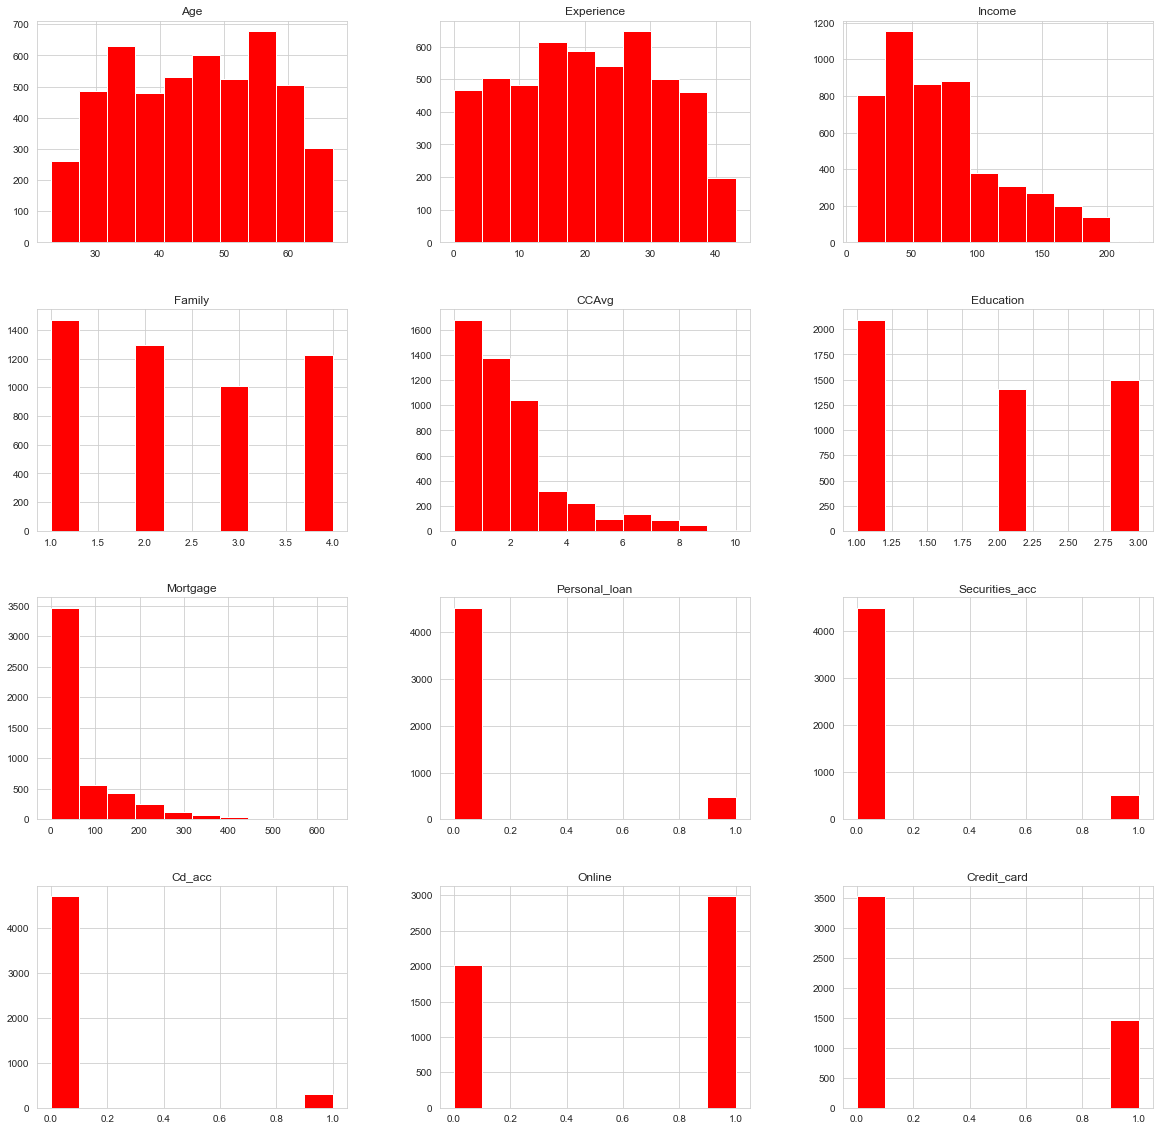

In [136]:
# histogram
df_con.hist(figsize=(20,20), color='red')

---

<AxesSubplot:>

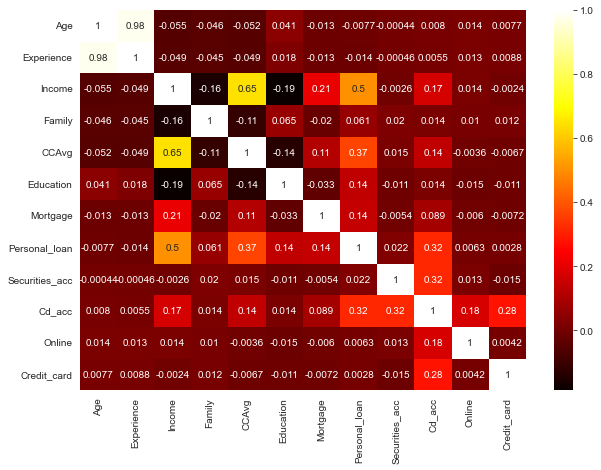

In [107]:
plt.figure(figsize=(10,7))
sns.heatmap(df_con.corr(), annot= True, cmap='hot')

---

In [140]:
# We create a function to plot counts and distributions of a label variable and 
# target variable side by side. 


def plot_count_dist(dataframe, targetColumn, bin_df=df_bin, labelColumn='Personal_loan', figsize=(20,10), useBin=False):
    if useBin: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=targetColumn, data=bin_df, palette='hot')
        plt.subplot(1, 2, 2)
        sns.distplot(dataframe.loc[dataframe[labelColumn] == 1][targetColumn], 
                     color = "#004a4d", kde_kws={"label": "Loan"})
        sns.distplot(dataframe.loc[dataframe[labelColumn] == 0][targetColumn], 
                     color = "#7d0101", kde_kws={"label": "No Loan"})
        plt.legend()
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=targetColumn, data=dataframe, palette='hot')
        plt.subplot(1, 2, 2)
        sns.distplot(dataframe.loc[dataframe[labelColumn] == 1][targetColumn], 
                     color = "#004a4d", kde_kws={"label": "Loan"})
        sns.distplot(dataframe.loc[dataframe[labelColumn] == 0][targetColumn], 
                     color = "#7d0101", kde_kws={"label": "No Loan"})
        plt.legend()

---

In [98]:
def plot_box_dist(feature):
    fig = plt.figure(constrained_layout = True, figsize=(10,3))
    gs = gridspec.GridSpec(nrows=1, ncols=4, figure=fig)

    ax1 = fig.add_subplot(gs[0,:3])    
    sns.distplot(df_con.loc[df_con['Personal_loan'] == 0][feature],
                 kde = False, color = "#004a4d", norm_hist=False,
                 hist_kws = dict(alpha=0.8), bins=40,
                 label="Not Loan Customer", ax=ax1);
    sns.distplot(df_con.loc[df_con['Personal_loan'] == 1][feature],
                 kde = False, color = "#7d0101", norm_hist=False,
                 hist_kws = dict(alpha=0.6), bins=40,
                 label="Loan Customer", ax=ax1);
    ax2 = fig.add_subplot(gs[0,3])    
    sns.boxplot(df_con[feature], orient="v", color = "#989100",
                width = 0.2, ax=ax2);
    
    ax1.legend(loc='upper right');

---

Outliers degrade the learning performance. Outlier analysis is performed for each feature one-by-one. We use quartile analysis for outlier detection. For each feature, there are two plots below. On the left, there are two normalized histograms, one for each value of target variable. On the right, there is a box plot of the same feature. Both of them are analyzed together to get an idea about the outliers. From this point on, lower whisker of the boxplot is denoted as LW and upper whisker is denoted as UW. (For ML)

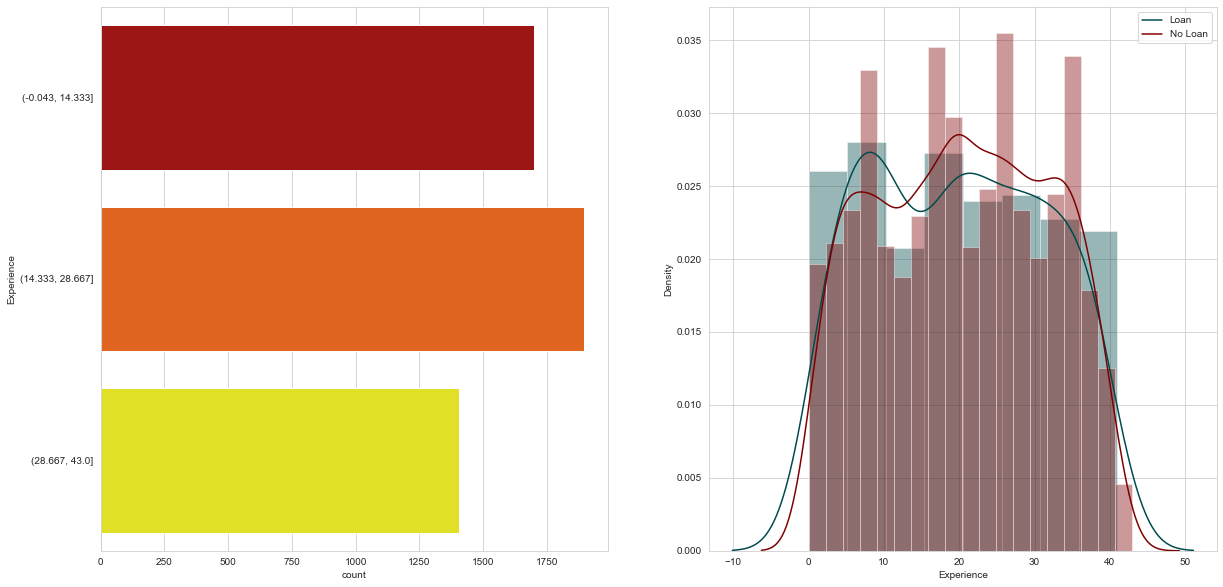

In [131]:
# relationship with experience
plot_count_dist(dataframe=df_con,targetColumn='Experience', useBin=True)

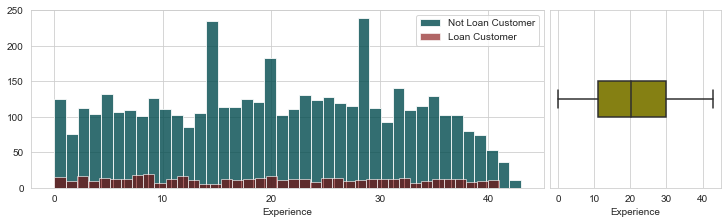

In [99]:
plot_box_dist('Experience')

There aren't any outliers for **Experience**.

---

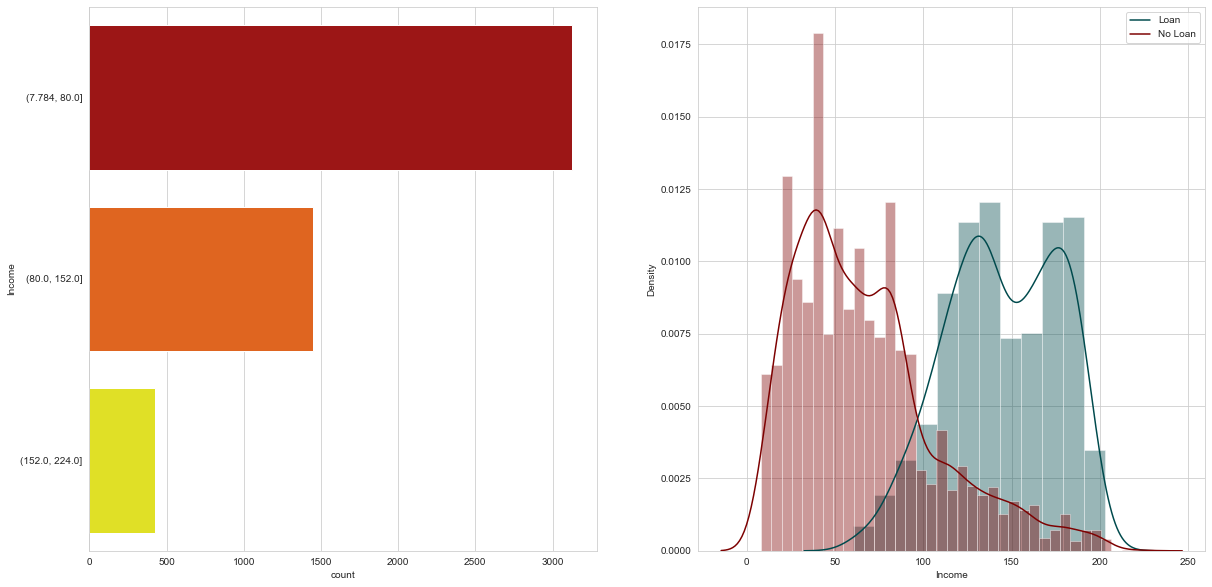

In [137]:
# relationship with income
plot_count_dist(dataframe=df_con,targetColumn='Income', useBin=True)

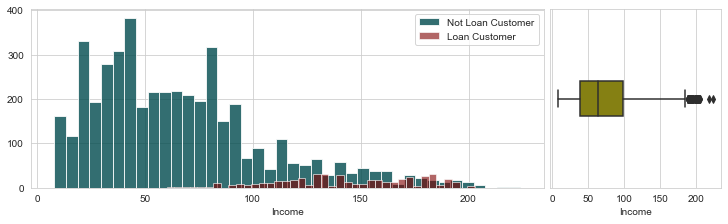

In [100]:
plot_box_dist('Income')

Distribution of **Income** feature is highly skewed. The samples higher than upper whiskers(UW) of the boxplot will be replaced with 95th quantile. (For ML)

In [138]:
# For ML

# Q1 = df_con['Income'].quantile(0.25)
# Q3 = df_con['Income'].quantile(0.75)
# q95th = df_con['Income'].quantile(0.95)
# IQR = Q3 - Q1
# UW = Q3 + 1.5*IQR

# df_con['Income'] = np.where(df_con['Income'] > UW, q95th, df_con['Income'])

---

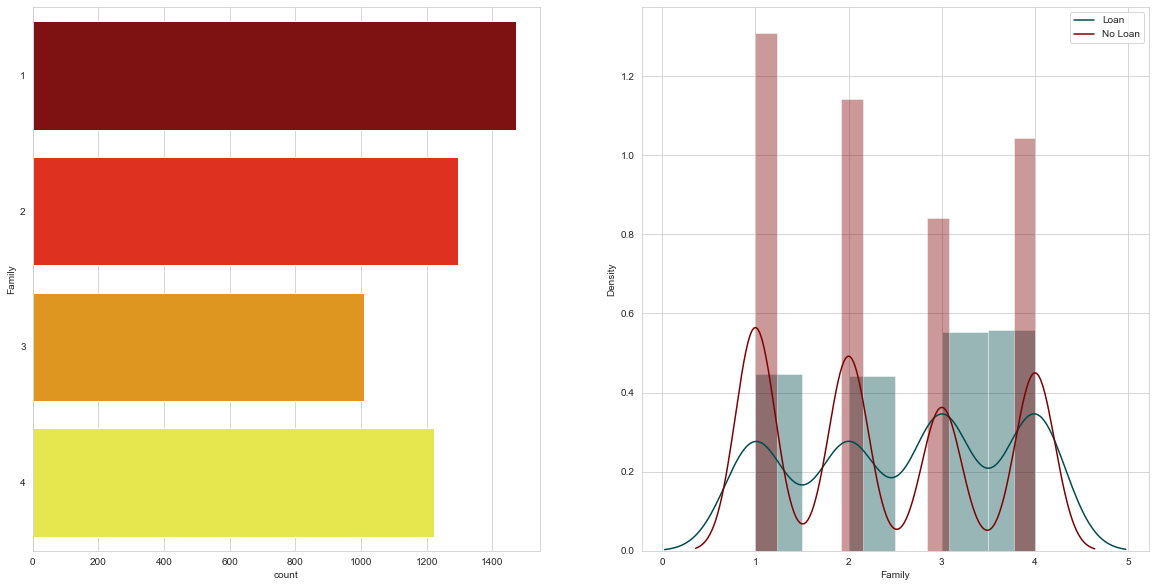

In [141]:
# relationship with family size
plot_count_dist(dataframe=df_con,targetColumn='Family')

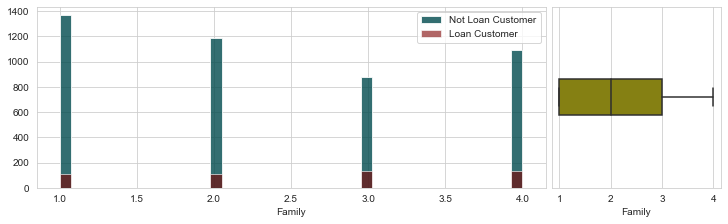

In [101]:
plot_box_dist('Family')

There aren't any outliers for **Family**.

---

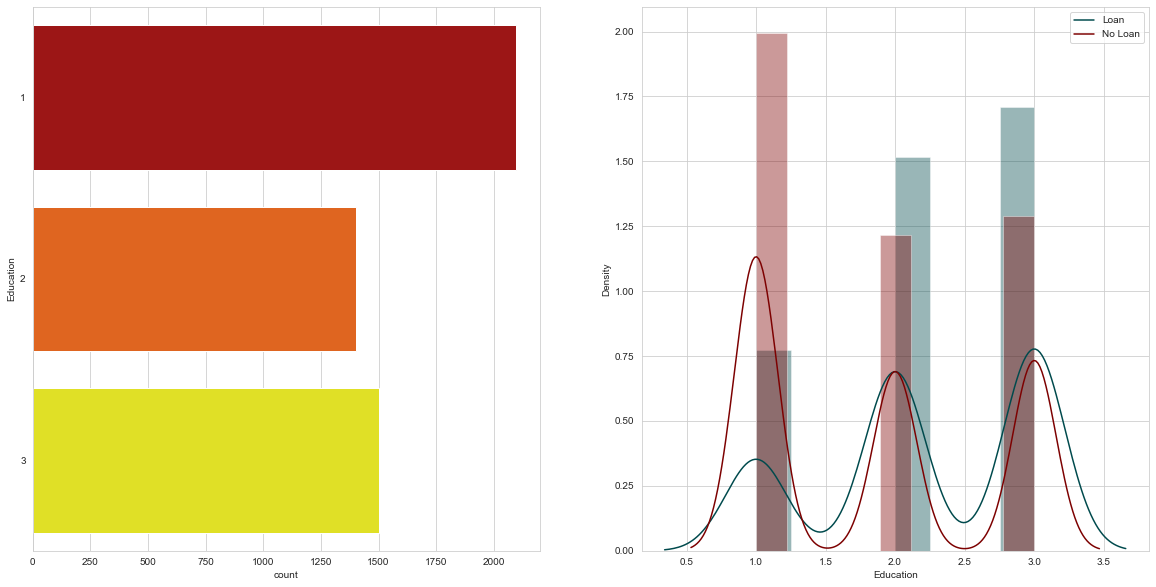

In [142]:
# relationship with education level
plot_count_dist(dataframe=df_con,targetColumn='Education')

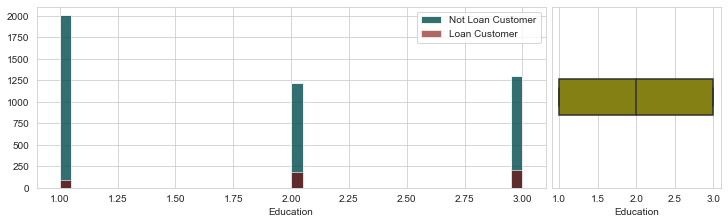

In [102]:
plot_box_dist('Education')

There aren't any outliers for **Education**.

---

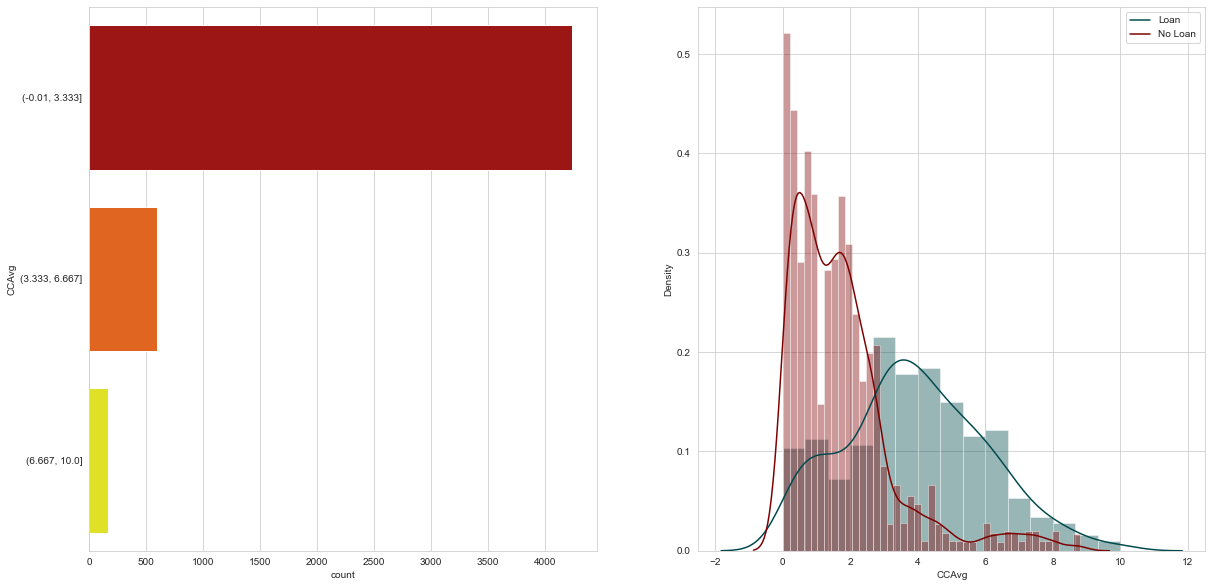

In [143]:
# relationship with average credit card spending
plot_count_dist(dataframe=df_con,targetColumn='CCAvg', useBin=True)

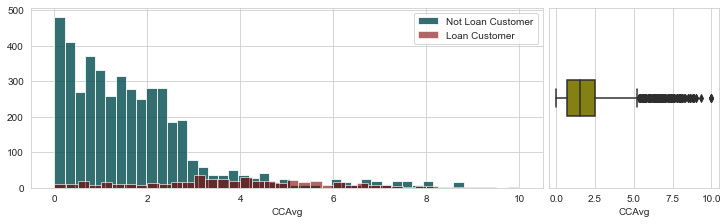

In [103]:
plot_box_dist('CCAvg')

Distribution of **Average Credit Card spending** is highly skewed. The samples higher than upper whiskers(UW) of the boxplot will be replaced with 95th quantile. (For ML)

In [ ]:
# For ML

# Q1 = df_con['CCAvg'].quantile(0.25)
# Q3 = df_con['CCAvg'].quantile(0.75)
# q95th = df_con['CCAvg'].quantile(0.95)
# IQR = Q3 - Q1
# UW = Q3 + 1.5*IQR

# df_con['CCAvg'] = np.where(df_con['CCAvg'] > UW, q95th, df_con['CCAvg'])

---

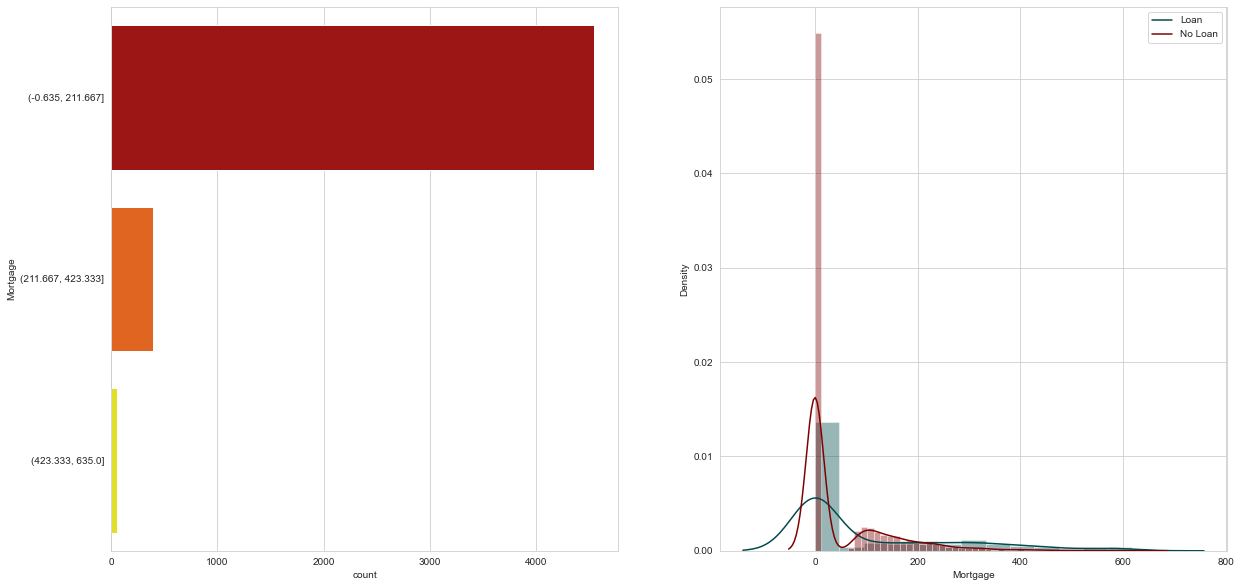

In [144]:
# relationship with mortage
plot_count_dist(dataframe=df_con,targetColumn='Mortgage', useBin=True)

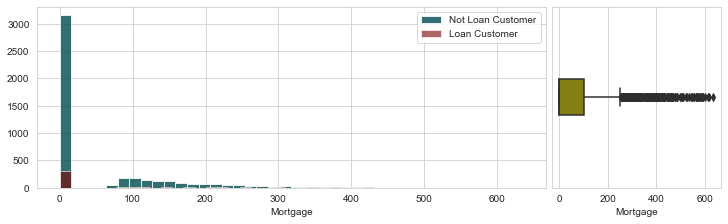

In [104]:
plot_box_dist('Mortgage')

Distribution of **Mortgage** is highly skewed. The samples higher than upper whiskers(UW) of the boxplot will be replaced with 95th quantile. (For ML)

In [ ]:
# For ML

# Q1 = df_con['Mortgage'].quantile(0.25)
# Q3 = df_con['Mortgage'].quantile(0.75)
# q95th = df_con['Mortgage'].quantile(0.95)
# IQR = Q3 - Q1
# UW = Q3 + 1.5*IQR

# df_con['Mortgage'] = np.where(df_con['Mortgage'] > UW, q95th, df_con['Mortgage'])

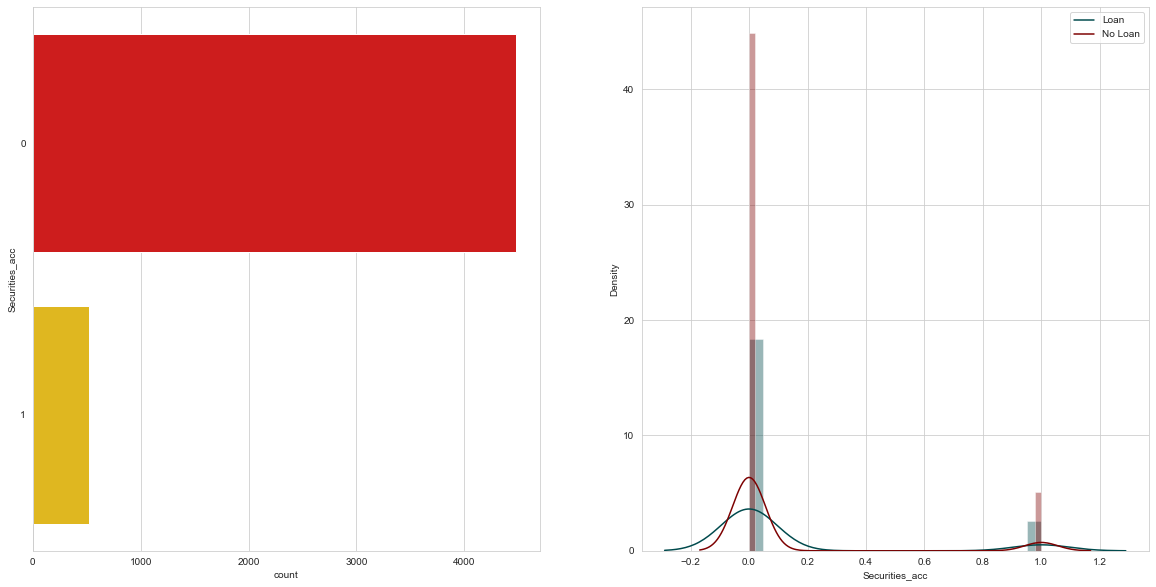

In [145]:
# relationship with security accounts
plot_count_dist(dataframe=df_con,targetColumn='Securities_acc')

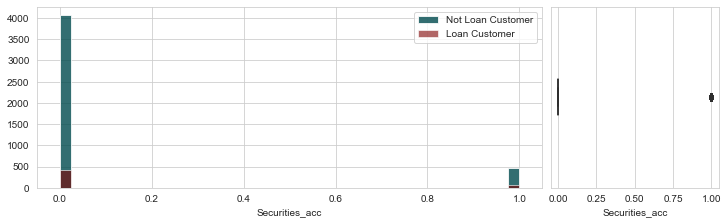

In [105]:
plot_box_dist('Securities_acc')

There's outliers for **Security accounts**.

---

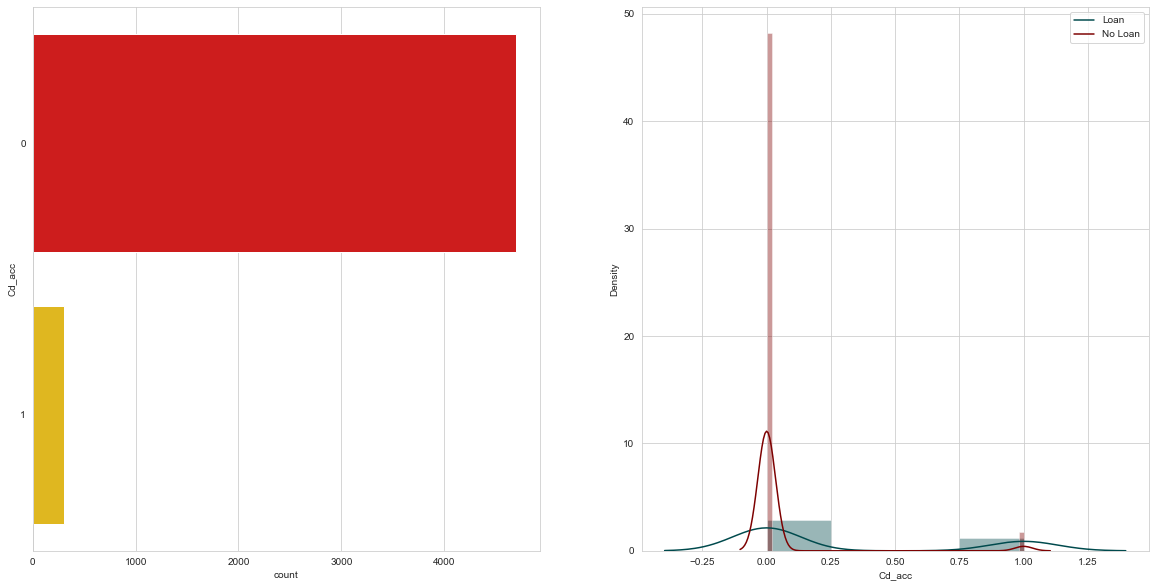

In [146]:
# relationship with certified deposit accounts
plot_count_dist(dataframe=df_con,targetColumn='Cd_acc')

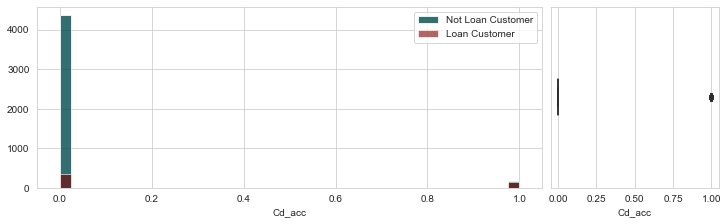

In [106]:
plot_box_dist('Cd_acc')

There's outliers for **Deposit accounts**.

---

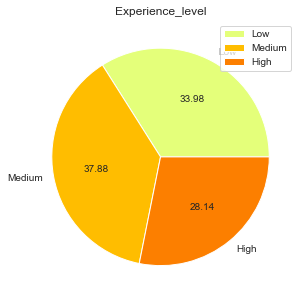

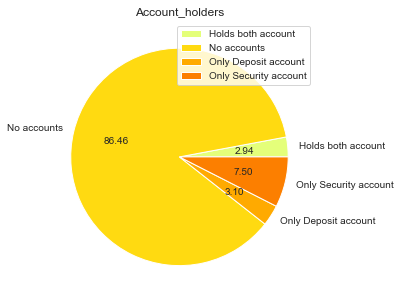

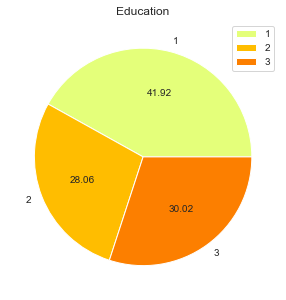

In [193]:
# piechart
data_cols = ['Experience_level','Account_holders', 'Education']

#define Seaborn color palette to use
colours = sns.color_palette("pastel")[0:3]

for x in data_cols:
    plt.figure(figsize= (15,5))
    df_bin.groupby(x).size().plot(kind='pie', autopct='%.2f', legend=True, colormap='Wistia')
    plt.title(x)
    plt.ylabel("")
    plt.show()

In [40]:
# defining a function to create KDE plot
def plot_loan(col, title, label1='With NO loan',label2='With loan'):
    plt.figure(figsize=(8,8))
    sns.kdeplot(df_con[df_con['Personal_loan']==0][col],label=label1, color='Red')
    sns.kdeplot(df_con[df_con['Personal_loan']==1][col],label=label2, color= 'Darkblue')
    plt.legend()
    plt.title(title)

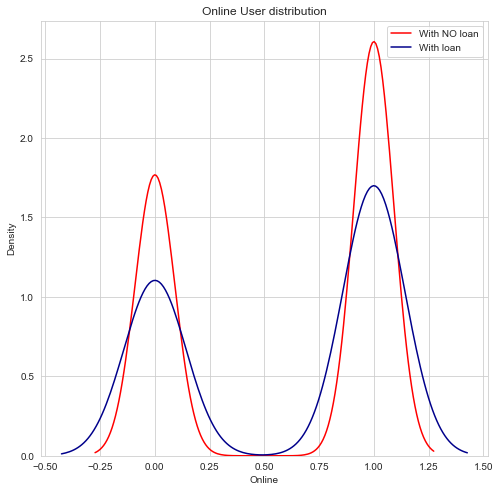

In [41]:
plot_loan(col='Online', title='Online User distribution')

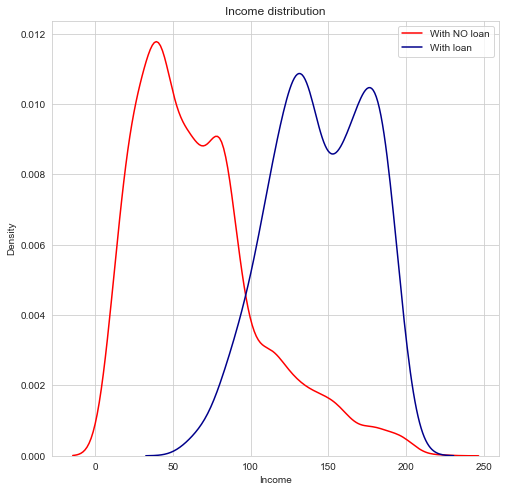

In [42]:
plot_loan(col='Income', title='Income distribution')

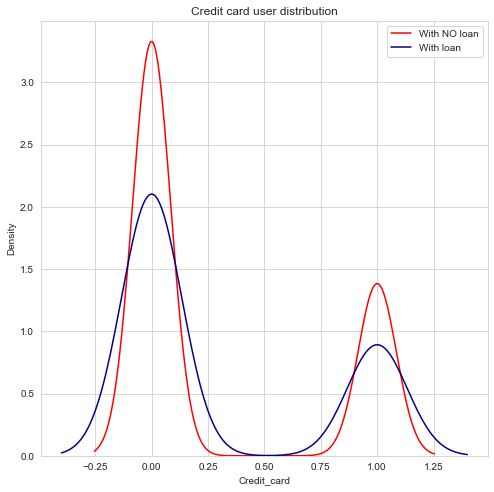

In [43]:
plot_loan(col='Credit_card', title='Credit card user distribution')

In [91]:
df_con.columns

Index(['Age', 'Experience', 'Income', 'Zip_code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_loan', 'Securities_acc', 'Cd_acc',
       'Online', 'Credit_card', 'Experience_level', 'Account_holders'],
      dtype='object')

---

## Null Hypothesis testing with T-test 

A null hypothesis (abbreviated H0) is a statistical conjecture that claims there is no difference between certain characteristics of a population or data-generating process.

A null hypothesis is a type of statistical hypothesis that asserts that there is no statistical significance in a given set of observations.

The following test measures whether the average (expected) value differs significantly across samples. If we observe a p-value larger than 0.05 (the level of significant) , we cannot reject the null hypothesis of identical average scores.

T test

is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features

P-value is the probability for the null hypothesis to be true

Is there any statistical difference between loan takers between the [Age] group?

In [113]:
# We create a function that inputs a Variable that we want to test the Null Hypothesis on by using T-Test. 
def pValue(var):
    arr1 = np.array(df_con[df_con['Personal_loan']==0][var])
    arr2 = np.array(df_con[df_con['Personal_loan']==1][var])
    _,p_value = stats.ttest_ind(a=arr1, b=arr2, axis=0)
    return p_value

In [111]:
pValue(var=['Mortgage','Age','Income','Family','Education','CCAvg','Experience']) < 0.05

array([ True, False,  True,  True,  True,  True, False])

In [110]:
pValue(var=['Mortgage','Age','Income','Family','Education','CCAvg','Experience'])

array([5.73034172e-024, 5.84959264e-001, 0.00000000e+000, 1.40990407e-005,
       2.70966319e-022, 3.81568364e-159, 3.20753602e-001])

In [114]:
variable = ['Mortgage','Age','Income','Family','Education','CCAvg','Experience']

for i in variable:
    if pValue(var=i) < 0.05:
        print('There is a statictical different between those who took personal loan and those who did not take in {} group. We reject the null hypothesis\n'.format(i))
    else:
        print('There is no statictical different between those who took personal loan and those who did not take in {} group. We fail to reject the null hypothesis\n'.format(i))

There is a statictical different between those who took personal loan and those who did not take in Mortgage group. We reject the null hypothesis

There is no statictical different between those who took personal loan and those who did not take in Age group. We fail to reject the null hypothesis

There is a statictical different between those who took personal loan and those who did not take in Income group. We reject the null hypothesis

There is a statictical different between those who took personal loan and those who did not take in Family group. We reject the null hypothesis

There is a statictical different between those who took personal loan and those who did not take in Education group. We reject the null hypothesis

There is a statictical different between those who took personal loan and those who did not take in CCAvg group. We reject the null hypothesis

There is no statictical different between those who took personal loan and those who did not take in Experience group. W